In [20]:
import face_recognition

In [23]:
! dir

 Volume in drive D is ADATA HD330
 Volume Serial Number is 1618-3260

 Directory of D:\youtube_furcifer\face recognition

04/05/2021  05:03 AM    <DIR>          .
04/05/2021  05:03 AM    <DIR>          ..
04/05/2021  05:09 AM           709,089 emma_stone1.jpg
04/05/2021  05:10 AM            31,373 emma_stone2.jpg
04/05/2021  05:10 AM           153,686 emma_stone3.jpg
04/05/2021  05:10 AM            69,842 jen_law1.jpg
04/05/2021  05:11 AM           285,922 jen_law2.jpg
04/05/2021  05:12 AM           718,271 emma-watson1.jpg
04/05/2021  05:12 AM           276,117 emma-watson2.jpg
04/05/2021  05:14 AM           643,353 emma-both-law.png
04/05/2021  05:53 AM             1,016 face-recognition.ipynb
04/05/2021  05:19 AM    <DIR>          .ipynb_checkpoints
               9 File(s)      2,888,669 bytes
               3 Dir(s)  630,711,058,432 bytes free


In [29]:
multiple_faces = face_recognition.load_image_file("emma-both-law.png")

In [34]:
multiple_faces.shape

(493, 630, 3)

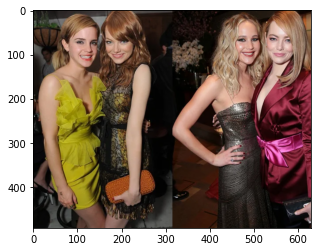

In [30]:
import matplotlib.pyplot as plt
plt.imshow(multiple_faces)

In [31]:
locs = face_recognition.face_locations(multiple_faces, model="cnn")

In [32]:
locs

[(50, 514, 107, 457),
 (41, 596, 109, 528),
 (55, 154, 123, 85),
 (48, 223, 116, 154)]

In [41]:
y1, x2, y2, x1 = locs[2]

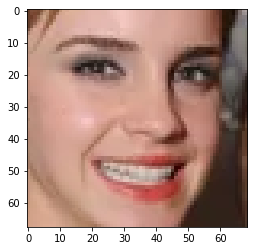

In [42]:
face1 = multiple_faces[y1:y2, x1:x2, :] 
plt.imshow(face1)
plt.show()

In [43]:
emma_st1 = face_recognition.load_image_file("emma_stone1.jpg")
emma_st_em1 = face_recognition.face_encodings(emma_st1)[0]

In [46]:
emma_st2 = face_recognition.load_image_file("emma_stone2.jpg")
emma_st_em2 = face_recognition.face_encodings(emma_st2)[0]

In [51]:
results = face_recognition.compare_faces(emma_st_em2, emma_st_em1) 

In [52]:
print(results)

[True]


In [53]:
emma_st2 = face_recognition.load_image_file("jen_law1.jpg")
emma_st_em2 = face_recognition.face_encodings(emma_st2)[0]

In [54]:
results = face_recognition.compare_faces(emma_st_em2, emma_st_em1) 

In [55]:
print(results)

[False]


In [56]:
# database
face_database = {
    "emma_stone": face_recognition.face_encodings( face_recognition.load_image_file("emma_stone1.jpg") )[0],
    "emma_watson": face_recognition.face_encodings( face_recognition.load_image_file("emma-watson1.jpg") )[0],
    "jen_law": face_recognition.face_encodings( face_recognition.load_image_file("jen_law1.jpg") )[0],
}


In [66]:
# recognition
random_enc = face_recognition.face_encodings( face_recognition.load_image_file("emma_stone3.jpg") )[0]

for k in face_database:
    print(k) # name
    if face_recognition.compare_faces( [face_database[k]], random_enc )[0] == True:
        print(f"Face matched with {k}")
        break

emma_stone
Face matched with emma_stone
